### Notebook to study explicitly the binary/ascii nature of the files from wavedump 2

this notebook currently has the very simple calibration included

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import struct
from tqdm import tqdm
import math as m

### binary solution

In [34]:
filepath = '/home/e78368jw/Downloads/tmp_out/testing_arena/Acq_dig2-usb25477_CH0_20240729164957-08.bin'


In [35]:
 with open(filepath, mode = 'rb') as file:
    data = file.read()


#### Looking at the initial component of the binary file

In [36]:
data_head = struct.unpack('iiiii', data[:20])
print(data_head)

(545, 51071950, 0, 12500, 8)


In [37]:
data_body = struct.unpack("i" * ((len(data) - 24) // 4), data[20:-4])
print(data_body)

(0, -1052535423, -1052334096, -1051663008, -1051931443, -1051998552, -1052669641, -1052266988, -1053005185, -1052334096, -1052938076, -1051663008, -1051797225, -1051260355, -1050924810, -1051461681, -1051126137, -1052736750, -1051595899, -1052468314, -1051126137, -1051663008, -1050320830, -1050790593, -1049649742, -1050320830, -1050522157, -1049716851, -1050522157, -1049515524, -1050320830, -1049582633, -1050387939, -1049515524, -1049716851, -1048978653, -1049045762, -1048710218, -1048341119, -1048911544, -1048844435, -1049783960, -1048978653, -1049515524, -1048542446, -1048911544, -1048576000, -1049582633, -1049515524, -1049783960, -1050186613, -1049851068, -1050052395, -1049515524, -1050119504, -1049515524, -1050387939, -1049783960, -1049985286, -1049851068, -1049918177, -1050455048, -1049179980, -1050052395, -1048978653, -1050320830, -1048978653, -1049515524, -1048844435, -1048978653, -1048274010, -1048374673, -1048005575, -1048106238, -1048139792, -1047938466, -1048206901, -1047837

In [38]:
data_end = struct.unpack("i", data[-4:])
print(data_end)

(1104880337,)


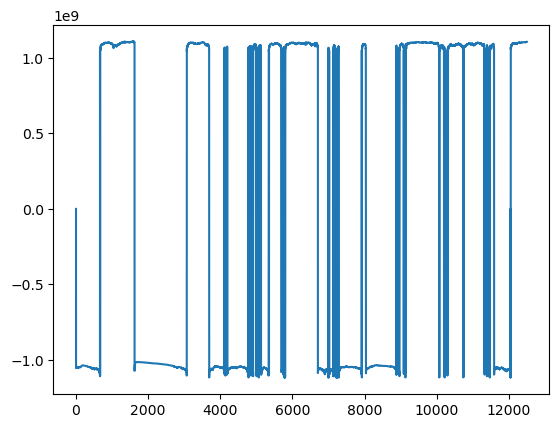

In [41]:
time = np.linspace(0,len(data_body), num = len(data_body))
plt.plot(time, data_body)
plt.show()

### read txt files

In [2]:
filepath = '/home/e78368jw/Downloads/tmp_out/testing_arena/test/Acq_dig2-usb25477_CH0_20240729174035-12.txt'

In [3]:
 with open(filepath, mode = 'rb') as file:
    data_txt = file.read()

In [4]:
print(data_txt[:66])
print(data_txt[63:128].decode('ascii').split('\t'))
#for i in range(len(data_txt[]))
#print(data_txt[64:128].split('\t'))

data_txt_full = data_txt[63:(12500*6)+63]
data_txt_full = data_txt_full[:-1]
data_txt_full = np.array(data_txt_full.decode('ascii').split('\t'), dtype = int)


print(int(data_txt_full[0]))
#data_txt_full = [int(i) for i in data_txt_full]

time = np.linspace(0,len(data_txt_full), num = len(data_txt_full))


b'Event n. 0\nTimeStamp: 82118\nSamples: 12500\n1 Sample = 0.008 us\n324'
['32439', '32448', '32440', '32455', '32453', '32446', '32456', '32450', '32465', '32461', '32474']
32439


In [5]:
#(len(data_txt_full) - 1) / 12500
print(data_txt_full[:10])
print(time[:10])

[32439 32448 32440 32455 32453 32446 32456 32450 32465 32461]
[0.         1.00008001 2.00016001 3.00024002 4.00032003 5.00040003
 6.00048004 7.00056004 8.00064005 9.00072006]


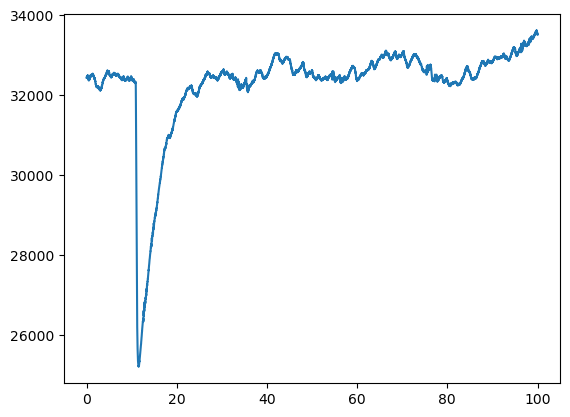

In [6]:
plt.plot(time*0.008, data_txt_full)
plt.show()

In [7]:
def ascii_to_df(data):
    '''
    should already be read in as shown above
    '''

    # split them by 'Event', first element is empty so ignored
    data_txt_full = (data.decode('ascii').split('Event n.'))[1:]


    # remove majority of nonsense values
    stripped_data = [item.split(' Sample')[1].split('\n', 1)[1] for item in data_txt_full]


    
    return [np.array(item.split('	')[:-1], dtype = int) for item in stripped_data]
    

In [8]:
test = data_txt.decode('ascii').split('Event n.')
# remove first element
test_trim = test[1:]


#print(test_trim[0].split(' Sample')[1].split('\n', 1)[1])


print(test_trim[0])
print(test_trim[1])
#print(test_trim[2])
#print(test_trim[3])
stripped_data = [item.split(' Sample')[1].split('\n', 1)[1] for item in test_trim]
print("======== TRIMMED DATA =======")
print(stripped_data[0])
print(stripped_data[1])
#print([x.split('\n')[0:10] for x in test])

# remove last element (\n)
final_data = [np.array(item.split('	')[:-1], dtype = int) for item in stripped_data]

print(final_data[0])
print(final_data[1])

 0
TimeStamp: 82118
Samples: 12500
1 Sample = 0.008 us
32439	32448	32440	32455	32453	32446	32456	32450	32465	32461	32474	32462	32471	32456	32464	32461	32476	32469	32470	32484	32479	32485	32480	32490	32480	32486	32486	32487	32493	32484	32494	32486	32488	32475	32488	32464	32475	32454	32460	32448	32444	32440	32428	32428	32412	32420	32408	32416	32404	32412	32405	32409	32412	32398	32404	32382	32393	32378	32388	32373	32387	32386	32392	32393	32388	32380	32371	32379	32375	32385	32375	32397	32390	32392	32396	32394	32396	32392	32407	32399	32410	32405	32412	32404	32408	32406	32412	32420	32416	32427	32419	32436	32434	32446	32438	32446	32452	32448	32453	32452	32454	32453	32484	32474	32488	32485	32489	32477	32483	32482	32480	32485	32493	32506	32496	32510	32500	32504	32488	32491	32488	32480	32488	32486	32500	32484	32502	32490	32497	32474	32484	32473	32479	32481	32480	32489	32476	32490	32477	32490	32483	32490	32488	32491	32494	32488	32500	32490	32508	32489	32512	32492	32515	32503	32512	32515	32517	325

In [9]:
func_data = ascii_to_df(data_txt)
print(len(func_data[0]))

12500


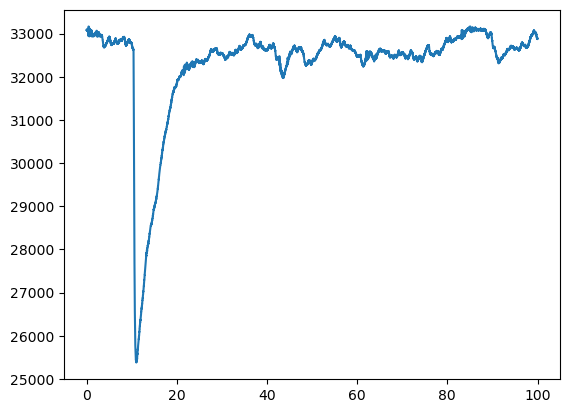

In [19]:
var = 3

time = np.linspace(0,len(func_data[var]), num = len(func_data[var]), dtype = int) 
plt.plot(time*0.008, func_data[var])
plt.show()

In [21]:
print(data_txt[:63].decode('ascii'))
print(f'{time[-1]:.2f}')

Event n. 0
TimeStamp: 82118
Samples: 12500
1 Sample = 0.008 us

12500.00


### now lets process a dataframe

- baseline subtraction
- window selection (start, length)


**SELECT STANDARD PARAMETERS**

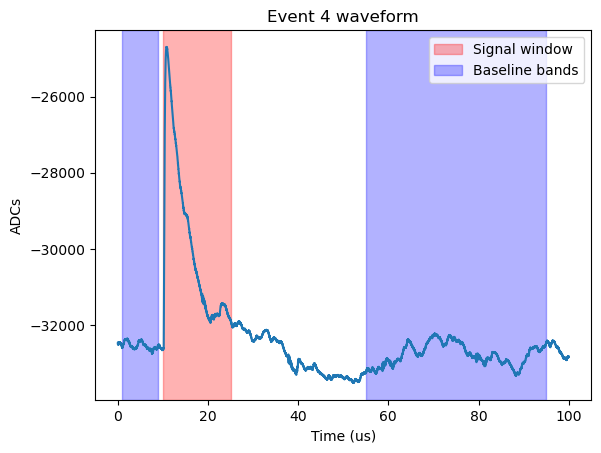

In [87]:
# MISC VALUES
bin_size         = 0.008           # us, time spacing between bins
var              = 4               # waveforn number for visualising
negative         = True            # flips from negative to positive

# WINDOW VALUES
WINDOW_START     = 10              # us
WINDOW_END       = 25              # us
BASELINE_POINT_1 = 5               # us, DONT SET THIS TO THE MINIMUM (0)
BASELINE_POINT_2 = 75              # us, DONT SET THIS TO THE MAXIMUM
BASELINE_RANGE_1  = 4              # us, DONT LET THIS EXCEED THE MINIMUM/MAXIMUM
BASELINE_RANGE_2  = 20             # us, DONT LET THIS EXCEED THE MINIMUM/MAXIMUM

# PACKAGING THE WINDOW VALUES
window_args = [WINDOW_START, WINDOW_END, BASELINE_POINT_1, BASELINE_POINT_2, BASELINE_RANGE_1, BASELINE_RANGE_2]



time = np.linspace(0,len(func_data[var]), num = len(func_data[var]), dtype = int)
time = time * bin_size # reshape

if (negative == True):
    plt.plot(time, -func_data[var])
elif (negative == False):
    plt.plot(time, func_data[var])
plt.axvspan(WINDOW_START, WINDOW_END, alpha = 0.3, color = 'red', label = 'Signal window')
plt.axvspan(BASELINE_POINT_1 - BASELINE_RANGE_1, BASELINE_POINT_1 + BASELINE_RANGE_1, alpha = 0.3, color = 'blue', label = 'Baseline bands')
plt.axvspan(BASELINE_POINT_2 - BASELINE_RANGE_2, BASELINE_POINT_2 + BASELINE_RANGE_2, alpha = 0.3, color = 'blue')
plt.xlabel('Time (us)')
plt.ylabel('ADCs')
plt.title(f'Event {var} waveform')
plt.legend()
plt.show()

**DEFINING PROCESSING FUNCTIONS**

In [88]:
def subtract_baseline(y_data, type = 'median'):
    '''
    determines the value that should be subtracted to produce baseline
    '''


    # convert y_data to numpy array for your own sanity
    y_data = np.array(y_data)

    # MEAN METHOD
    # add all ADC values and divide by length (rough), also remove negatives
    if (type=='mean'):
        total = (np.sum(y_data)/len(y_data))
    # MODE METHOD
    elif (type=='mode'):
        value, counts = np.unique(y_data, return_counts=True)
        m = counts.argmax()
        # counteracting mode being stupid
        #if counts[m] == 1:
        #    print("Only one count of this value, please use a different method! (Mode sucks Brais >:( ))")
        #else:
        #    total = value[m]
        total = value[m]
        ## SCIPY IS SLOW!
        ##return (stats.mode(y_data))
    # MEDIAN METHOD
    elif (type=='median'):
        total = np.median(y_data)
    else:
        print("Please input a baseline method, exiting...")
        return 0

    # return value to subtract
    return total


def integrate(y_data):
    '''
    collect the integral across an event by summing y components
    '''
    ####print("Baseline subtracted value: {}".format(y_data[25]))
    int_tot = np.sum(y_data)
    return(int_tot)


def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or m.fabs(value - array[idx-1]) < m.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

def collect_index(time, value):
    '''
    Collects the array index corresponding to a certain time value

    Args:
        time        (np.array)        :     Time array
        value       (float/int)       :     Value that you wish to locate the index of
    '''
    
    val = find_nearest(time, value)
    index = np.where(time == val)[0]

    if len(index == 1):
        return index[0]
    else:
        raise Exception("Must only collect one index! Are you sure you entered the right array?")


### the meaty function

def cook_data(data, bin_size, window_args, negative = False, baseline_mode = 'median', verbose = 0):
    '''
    Collects the charge histograms from waveform arrays via simple processing
    Spits out tuple containing BL-subtracted waveforms and charge of each signal.

    Args:
        data          (np.array)      :       Waveform data
        bin_size      (float)         :       Size of time bins within data
        window_args   (list)          :       list of window values for use in processing, ordered as such:
                                                     WINDOW_START    
                                                     WINDOW_END      
                                                     BASELINE_POINT_1
                                                     BASELINE_POINT_2
                                                     BASELINE_RANGE_1
                                                     BASELINE_RANGE_2
        negative      (bool)          :       Is the waveform negative? (flips to positive format)
        baseline_mode (string)        :       Mode of the baseline subtraction (median, mode, mean, etc).
        verbose       (int)          :       Print info: 0 is nothing, 1 is barebones, 2 includes plots

    Returns:
        results(
           sub_data   (array)         :       Baseline subtracted waveforms
           Q_data     (array)         :       Charge histogram data per waveform
        )


    '''
    # unpack window arguments
    ### TODO, PACK THIS IN AN ITERATIVE METHOD, THIS IS SILLY
    WINDOW_START     = window_args[0]   
    WINDOW_END       = window_args[1]
    BASELINE_POINT_1 = window_args[2]
    BASELINE_POINT_2 = window_args[3]
    BASELINE_RANGE_1 = window_args[4]  
    BASELINE_RANGE_2 = window_args[5]  


    # define time-span
    time = np.linspace(0,len(data[0]), num = len(data[0]), dtype = int) * bin_size


    start_index = collect_index(time, WINDOW_START)
    end_index   = collect_index(time, WINDOW_END)

    # make sure ranges dont go ape
    try:
        min_1 = BASELINE_POINT_1 - BASELINE_RANGE_1
        max_1 = BASELINE_POINT_1 + BASELINE_RANGE_1
        min_2 = BASELINE_POINT_2 - BASELINE_RANGE_2
        max_2 = BASELINE_POINT_2 + BASELINE_RANGE_2
        bl_range_1 = [collect_index(time, min_1),collect_index(time, max_1)]
        bl_range_2 = [collect_index(time, min_2),collect_index(time, max_2)]
    except:
        print(f'Range values out of range (lol): {min_1} - {max_1}, {min_2} - {max_2}')

    
    


    if (verbose > 0):
        print(f'{len(data)} events')
        print(f"Collecing sidebands across time ranges {min_1} - {max_1}, {min_2} - {max_2}")
        print(f"Sideband indexes: {bl_range_1[0]} - {bl_range_1[1]}, {bl_range_2[0]} - {bl_range_2[1]}")
        
        

    # currently doing this the lazy way (iteratively), will do it via mapping soon

    sub_data = []
    Q_data   = []
    i = 0 # annoying counter
    for wf in data:  # select each event to process

        # negative flip
        if (negative == True):
            wf = -wf

        #plot
        if (verbose > 1):

            plt.plot(time, wf)
            plt.axvspan(WINDOW_START, WINDOW_END, alpha = 0.3, color = 'red', label = 'Signal window')
            plt.axvspan(BASELINE_POINT_1 - BASELINE_RANGE_1, BASELINE_POINT_1 + BASELINE_RANGE_1, alpha = 0.3, color = 'blue', label = 'Baseline bands')
            plt.axvspan(BASELINE_POINT_2 - BASELINE_RANGE_2, BASELINE_POINT_2 + BASELINE_RANGE_2, alpha = 0.3, color = 'blue')
            plt.xlabel('Time (us)')
            plt.ylabel('ADCs')
            plt.title(f'Event {i} waveform')
            plt.legend()
            plt.show()
        
        ### baseline subtraction ###

        # take y values within sidebands, double index is because my formatting is stupid
        y_sideband = wf[bl_range_1[0]:bl_range_1[1]]
        y_sideband = list(y_sideband) + list(wf[bl_range_2[0]:bl_range_2[1]])

        # produce sub_wf
        sub_wf = wf - subtract_baseline(y_sideband, type = baseline_mode)
        sub_data.append(sub_wf)

        # calculate adc
        adc_val = integrate(sub_wf[start_index:end_index])
        Q_data.append(adc_val)

        if (verbose > 1):
            plt.plot(time, sub_wf)
            plt.xlabel('Time (us)')
            plt.ylabel('ADCs')
            plt.title(f'Event {i} subtracted waveform')
            plt.show()
        



        if (verbose > 0):
            print(f'Event {i} ADC value: {adc_val}')



        i += 1

    return (sub_data, Q_data)



**VISUAL DEMONSTRATION**

2 events
Collecing sidebands across time ranges 1 - 9, 55 - 95
Sideband indexes: 125 - 1125, 6875 - 11875


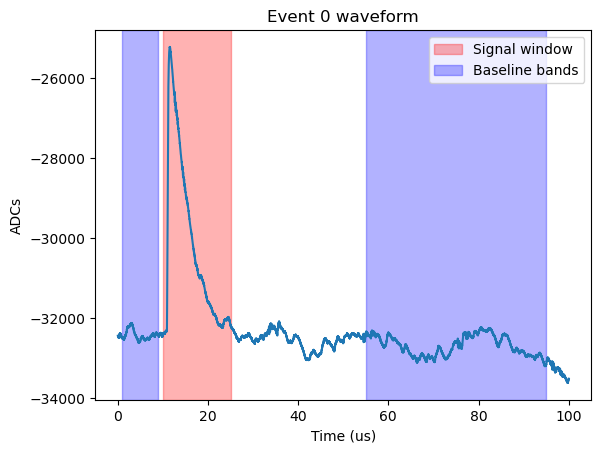

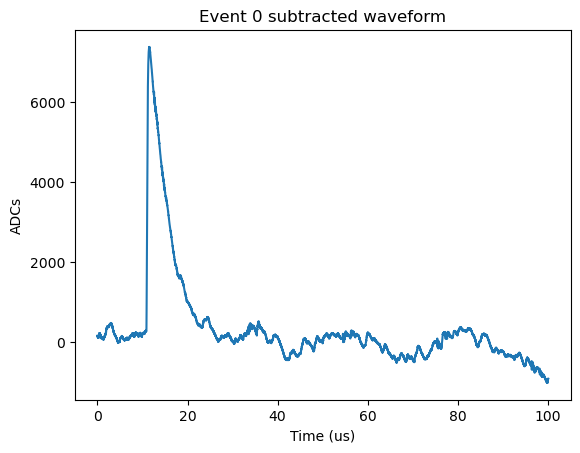

Event 0 ADC value: 4553203.0


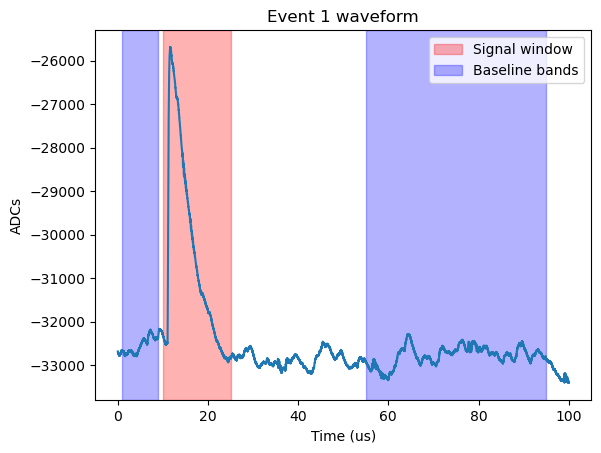

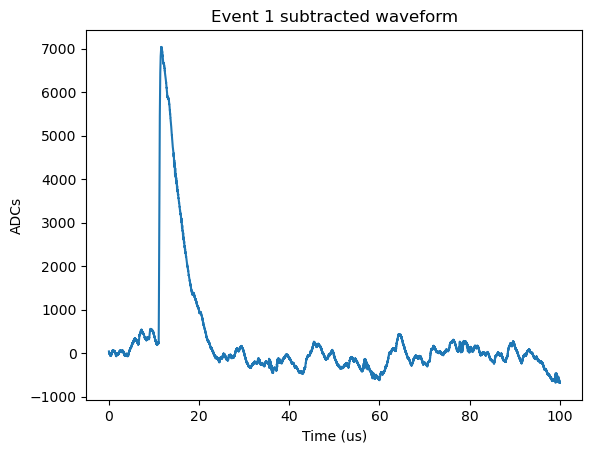

Event 1 ADC value: 4262246.0


In [89]:
# test dataset
test_data = func_data[0:2]


results = cook_data(test_data, bin_size, window_args, negative = negative, baseline_mode = 'median', verbose = 2)

**FULL DATA PROCESSING**

In [90]:
results = cook_data(func_data, bin_size, window_args, negative = negative, baseline_mode = 'median', verbose = 1)


589 events
Collecing sidebands across time ranges 1 - 9, 55 - 95
Sideband indexes: 125 - 1125, 6875 - 11875
Event 0 ADC value: 4553203.0
Event 1 ADC value: 4262246.0
Event 2 ADC value: 5227109.5
Event 3 ADC value: 4638991.0
Event 4 ADC value: 5381481.0
Event 5 ADC value: 4808121.0
Event 6 ADC value: 3067177.0
Event 7 ADC value: 4602997.0
Event 8 ADC value: 5001583.0
Event 9 ADC value: 4482970.0
Event 10 ADC value: 5178842.0
Event 11 ADC value: 4748184.0
Event 12 ADC value: 5780636.0
Event 13 ADC value: 3967593.0
Event 14 ADC value: 5439630.0
Event 15 ADC value: 5278157.5
Event 16 ADC value: 4401972.5
Event 17 ADC value: 6338794.5
Event 18 ADC value: 4020419.0
Event 19 ADC value: 4299480.0
Event 20 ADC value: 4645792.0
Event 21 ADC value: 4738647.0
Event 22 ADC value: 4842310.0
Event 23 ADC value: 4298169.0
Event 24 ADC value: 3885388.0
Event 25 ADC value: 5269102.0
Event 26 ADC value: 5756195.0
Event 27 ADC value: 4434633.0
Event 28 ADC value: 4831607.0
Event 29 ADC value: 4708306.0
Ev

**GET THE FINGER PLOT**

Text(0, 0.5, 'Counts')

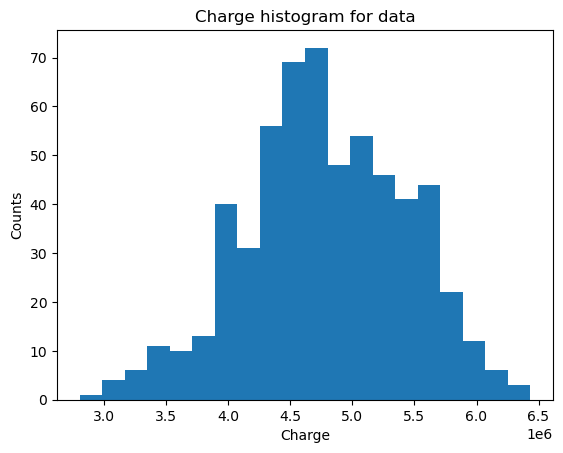

In [93]:
plt.hist(results[1], bins = 20)
plt.title('Charge histogram for data')
plt.xlabel('Charge')
plt.ylabel('Counts')